In [1]:
import random
import pandas as pd
import matplotlib.pyplot as plt

### Implementing K Means Clustering Algorithm

In [2]:
class KMeans:

    def fit(self, df, K):
        df = df.iloc[:, :] # Create a copy
        self.K = K
        self.centroids = {id : centroid for id, centroid in df.sample(self.K).reset_index(drop=True).iterrows()}
        for _ in range(100):
            self.get_closest_centroids(df)
            self.update_centroids(df)
        return df.centroid
            
    def update_centroids(self, df):
        for id in self.centroids.keys():
            self.centroids[id] = df[df.centroid == id].iloc[:, :-1].mean()

    def get_closest_centroids(self, df):
        df['centroid'] = None
        for i, row in df.iterrows():
            least_dist = float('inf')
            for id, centroid in self.centroids.items():
                eucledian_dist = sum((row[:-1] - centroid) ** 2) ** 0.5
                if eucledian_dist < least_dist:
                    least_dist = eucledian_dist
                    nearest_centroid = id
            df.loc[i, 'centroid'] = nearest_centroid

### Analysis on a synthetic dataset

In [3]:
# Dataset synthesis

x1, y1 = 50, 50
x2, y2 = 100, 50
x3, y3 = 75, 100

coordinates = list()
for _ in range(50):
    coordinates.append((x1 + random.randint(-20, 20), y1 + random.randint(-20, 20)))
    coordinates.append((x2 + random.randint(-20, 20), y2 + random.randint(-20, 20)))
    coordinates.append((x3 + random.randint(-20, 20), y3 + random.randint(-20, 20)))

df = pd.DataFrame(coordinates)
df.columns = ['x', 'y']
df.head()

,x,y
0,35,37
1,115,38
2,71,100
3,55,30
4,114,48


In [4]:
# Training

model = KMeans()
df.centroids = model.fit(df, 3)
print(model.centroids)

{0: x    73.32
y    99.64
dtype: float64, 1: x    101.10
y     48.58
dtype: float64, 2: x    48.16
y    49.30
dtype: float64}


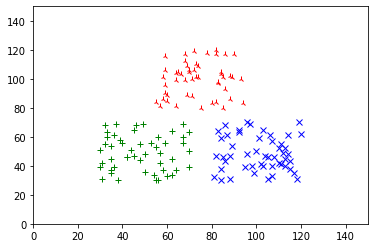

In [5]:
# Visualization

plt.plot(df[df.centroid == 0].x, df[df.centroid == 0].y, 'r2')
plt.plot(df[df.centroid == 1].x, df[df.centroid == 1].y, 'bx')
plt.plot(df[df.centroid == 2].x, df[df.centroid == 2].y, 'g+')

plt.axis([0, 150, 0, 150])
plt.show()

### Analysis on Iris Dataset

In [6]:
# Loading the Dataset and Training

df = pd.read_csv('iris.csv')
model = KMeans()
df['category'] = model.fit(df.iloc[:, :-1], 3)

In [7]:
# Accuracy calculation

setosa_category = df[df.species == 'setosa'].category.mode().sum()
correct_preds = df[(df.species == 'setosa') & (df.category == setosa_category)].shape[0]

virginica_category = df[df.species == 'virginica'].category.mode().sum()
correct_preds += df[(df.species == 'virginica') & (df.category == virginica_category)].shape[0]

versicolor_category = df[df.species == 'versicolor'].category.mode().sum()
correct_preds += df[(df.species == 'versicolor') & (df.category == versicolor_category)].shape[0]

print('Accuracy:', correct_preds / df.shape[0])

Accuracy: 0.8933333333333333
